In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import japanize_matplotlib

In [3]:
CENSUS_POPULATION_PATH = 'data/FEH_00200521_250109010954.csv'
LG_CODE_PATH = 'data/000925835.xlsx'
TOKYO_ADMIN_PATH = 'data/shape/N03-20240101_13.geojson'

In [4]:
df_population = pd.read_csv(CENSUS_POPULATION_PATH, encoding='shift-jis', skiprows=14, dtype={'全国，都道府県，市区町村（人口集中地区） コード' : 'str'})
df_population

,時間軸（年次） コード,時間軸（年次） 補助コード,時間軸（年次）,国籍総数か日本人 コード,国籍総数か日本人 補助コード,国籍総数か日本人,男女 コード,男女 補助コード,男女,全国，都道府県，市区町村（人口集中地区） コード,...,90〜94歳,95〜99歳,100歳以上,年齢「不詳」,（再掲）15歳未満,（再掲）15〜64歳,（再掲）65歳以上,（再掲）75歳以上,（再掲）85歳以上,（再掲）20〜69歳
0,2020000000,NaN,2020年,0,NaN,国籍総数,0,NaN,総数,00000,...,983383,253476,39738,2555614,10660791,52836316,22233206,11399430,3479063,53909973
1,2020000000,NaN,2020年,0,NaN,国籍総数,0,NaN,総数,01000,...,57245,15091,2263,52478,432950,2303957,1183622,587281,194610,2419768
2,2020000000,NaN,2020年,0,NaN,国籍総数,0,NaN,総数,01100,...,25388,6645,993,30514,209256,1156977,519290,252071,84863,1205248
3,2020000000,NaN,2020年,0,NaN,国籍総数,0,NaN,総数,01101,...,3176,800,113,9537,23694,156945,56397,27876,10309,161415
4,2020000000,NaN,2020年,0,NaN,国籍総数,0,NaN,総数,01102,...,3394,846,133,4328,32538,169440,73872,35192,11313,174756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6223,2020000000,NaN,2020年,1,NaN,うち日本人,2,NaN,女,47328,...,19,14,1,149,1006,2782,399,172,68,2666
6224,2020000000,NaN,2020年,1,NaN,うち日本人,2,NaN,女,47329,...,61,16,1,6,908,3201,1285,553,187,3334
6225,2020000000,NaN,2020年,1,NaN,うち日本人,2,NaN,女,47348,...,101,40,12,6,1592,5186,1751,857,330,5229
6226,2020000000,NaN,2020年,1,NaN,うち日本人,2,NaN,女,47350,...,137,40,8,15,3361,9927,2880,1317,462,9983


In [5]:
df_population.columns

Index(['時間軸（年次） コード', '時間軸（年次） 補助コード', '時間軸（年次）', '国籍総数か日本人 コード',
       '国籍総数か日本人 補助コード', '国籍総数か日本人', '男女 コード', '男女 補助コード', '男女',
       '全国，都道府県，市区町村（人口集中地区） コード', '全国，都道府県，市区町村（人口集中地区） 補助コード',
       '全国，都道府県，市区町村（人口集中地区）', '/年齢', '総数', '0〜4歳', '5〜9歳', '10〜14歳', '15〜19歳',
       '20〜24歳', '25〜29歳', '30〜34歳', '35〜39歳', '40〜44歳', '45〜49歳', '50〜54歳',
       '55〜59歳', '60〜64歳', '65〜69歳', '70〜74歳', '75〜79歳', '80〜84歳', '85〜89歳',
       '90〜94歳', '95〜99歳', '100歳以上', '年齢「不詳」', '（再掲）15歳未満', '（再掲）15〜64歳',
       '（再掲）65歳以上', '（再掲）75歳以上', '（再掲）85歳以上', '（再掲）20〜69歳'],
      dtype='object')

In [6]:
columns = ['総数', '0〜4歳', '5〜9歳', '10〜14歳', '15〜19歳',
       '20〜24歳', '25〜29歳', '30〜34歳', '35〜39歳', '40〜44歳', '45〜49歳', '50〜54歳',
       '55〜59歳', '60〜64歳', '65〜69歳', '70〜74歳', '75〜79歳', '80〜84歳', '85〜89歳',
       '90〜94歳', '95〜99歳', '100歳以上']

for column in columns:
    df_population[column] = df_population[column].apply(pd.to_numeric, errors='coerce').fillna(0)

In [7]:
df_population['old'] = (df_population['80〜84歳'] + df_population['85〜89歳'] + df_population['90〜94歳'] + df_population['95〜99歳'] + df_population['100歳以上']) / df_population['総数']
df_population 

,時間軸（年次） コード,時間軸（年次） 補助コード,時間軸（年次）,国籍総数か日本人 コード,国籍総数か日本人 補助コード,国籍総数か日本人,男女 コード,男女 補助コード,男女,全国，都道府県，市区町村（人口集中地区） コード,...,95〜99歳,100歳以上,年齢「不詳」,（再掲）15歳未満,（再掲）15〜64歳,（再掲）65歳以上,（再掲）75歳以上,（再掲）85歳以上,（再掲）20〜69歳,old
0,2020000000,NaN,2020年,0,NaN,国籍総数,0,NaN,総数,00000,...,253476.0,39738.0,2555614,10660791,52836316,22233206,11399430,3479063,53909973,0.077583
1,2020000000,NaN,2020年,0,NaN,国籍総数,0,NaN,総数,01000,...,15091.0,2263.0,52478,432950,2303957,1183622,587281,194610,2419768,0.092213
2,2020000000,NaN,2020年,0,NaN,国籍総数,0,NaN,総数,01100,...,6645.0,993.0,30514,209256,1156977,519290,252071,84863,1205248,0.081872
3,2020000000,NaN,2020年,0,NaN,国籍総数,0,NaN,総数,01101,...,800.0,113.0,9537,23694,156945,56397,27876,10309,161415,0.073151
4,2020000000,NaN,2020年,0,NaN,国籍総数,0,NaN,総数,01102,...,846.0,133.0,4328,32538,169440,73872,35192,11313,174756,0.076901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6223,2020000000,NaN,2020年,1,NaN,うち日本人,2,NaN,女,47328,...,14.0,1.0,149,1006,2782,399,172,68,2666,0.025830
6224,2020000000,NaN,2020年,1,NaN,うち日本人,2,NaN,女,47329,...,16.0,1.0,6,908,3201,1285,553,187,3334,0.067222
6225,2020000000,NaN,2020年,1,NaN,うち日本人,2,NaN,女,47348,...,40.0,12.0,6,1592,5186,1751,857,330,5229,0.067604
6226,2020000000,NaN,2020年,1,NaN,うち日本人,2,NaN,女,47350,...,40.0,8.0,15,3361,9927,2880,1317,462,9983,0.052524


In [8]:
df_population = df_population[(df_population['男女'] == '総数') & (df_population['国籍総数か日本人'] == '国籍総数')]
df_population

,時間軸（年次） コード,時間軸（年次） 補助コード,時間軸（年次）,国籍総数か日本人 コード,国籍総数か日本人 補助コード,国籍総数か日本人,男女 コード,男女 補助コード,男女,全国，都道府県，市区町村（人口集中地区） コード,...,95〜99歳,100歳以上,年齢「不詳」,（再掲）15歳未満,（再掲）15〜64歳,（再掲）65歳以上,（再掲）75歳以上,（再掲）85歳以上,（再掲）20〜69歳,old
0,2020000000,NaN,2020年,0,NaN,国籍総数,0,NaN,総数,00000,...,253476.0,39738.0,2555614,10660791,52836316,22233206,11399430,3479063,53909973,0.077583
1,2020000000,NaN,2020年,0,NaN,国籍総数,0,NaN,総数,01000,...,15091.0,2263.0,52478,432950,2303957,1183622,587281,194610,2419768,0.092213
2,2020000000,NaN,2020年,0,NaN,国籍総数,0,NaN,総数,01100,...,6645.0,993.0,30514,209256,1156977,519290,252071,84863,1205248,0.081872
3,2020000000,NaN,2020年,0,NaN,国籍総数,0,NaN,総数,01101,...,800.0,113.0,9537,23694,156945,56397,27876,10309,161415,0.073151
4,2020000000,NaN,2020年,0,NaN,国籍総数,0,NaN,総数,01102,...,846.0,133.0,4328,32538,169440,73872,35192,11313,174756,0.076901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,2020000000,NaN,2020年,0,NaN,国籍総数,0,NaN,総数,47328,...,16.0,1.0,849,2092,5648,720,295,97,5387,0.020518
1034,2020000000,NaN,2020年,0,NaN,国籍総数,0,NaN,総数,47329,...,20.0,2.0,104,1930,6482,2440,995,304,6699,0.058781
1035,2020000000,NaN,2020年,0,NaN,国籍総数,0,NaN,総数,47348,...,49.0,13.0,270,3343,10150,3168,1413,479,10242,0.053275
1036,2020000000,NaN,2020年,0,NaN,国籍総数,0,NaN,総数,47350,...,46.0,10.0,265,6875,19493,5332,2324,694,19512,0.045206


In [9]:
df_population = df_population.rename(columns={
    '全国，都道府県，市区町村（人口集中地区） コード': 'code',
    '全国，都道府県，市区町村（人口集中地区）': 'name'
})

df_population = df_population[['code', 'name', 'old']]
df_population

,code,name,old
0,00000,全国,0.077583
1,01000,北海道,0.092213
2,01100,札幌市,0.081872
3,01101,札幌市中央区,0.073151
4,01102,札幌市北区,0.076901
...,...,...,...
1033,47328,中城村,0.020518
1034,47329,西原町,0.058781
1035,47348,与那原町,0.053275
1036,47350,南風原町,0.045206


In [10]:
df_lg = pd.read_excel(LG_CODE_PATH, dtype=str)
df_lg

,団体コード,都道府県名\n（漢字）,市区町村名\n（漢字）,都道府県名\n（カナ）,市区町村名\n（カナ）
0,010006,北海道,NaN,ﾎｯｶｲﾄﾞｳ,NaN
1,011002,北海道,札幌市,ﾎｯｶｲﾄﾞｳ,ｻｯﾎﾟﾛｼ
2,012025,北海道,函館市,ﾎｯｶｲﾄﾞｳ,ﾊｺﾀﾞﾃｼ
3,012033,北海道,小樽市,ﾎｯｶｲﾄﾞｳ,ｵﾀﾙｼ
4,012041,北海道,旭川市,ﾎｯｶｲﾄﾞｳ,ｱｻﾋｶﾜｼ
...,...,...,...,...,...
1789,473618,沖縄県,久米島町,ｵｷﾅﾜｹﾝ,ｸﾒｼﾞﾏﾁｮｳ
1790,473626,沖縄県,八重瀬町,ｵｷﾅﾜｹﾝ,ﾔｴｾﾁｮｳ
1791,473758,沖縄県,多良間村,ｵｷﾅﾜｹﾝ,ﾀﾗﾏｿﾝ
1792,473812,沖縄県,竹富町,ｵｷﾅﾜｹﾝ,ﾀｹﾄﾐﾁｮｳ


In [11]:
df_lg = df_lg.rename(columns = {
    '団体コード': 'code',
    '都道府県名\n（漢字）': 'prefecture',
    '市区町村名\n（漢字）': 'city'
})
df_lg = df_lg[['code', 'prefecture', 'city']]
df_lg

,code,prefecture,city
0,010006,北海道,NaN
1,011002,北海道,札幌市
2,012025,北海道,函館市
3,012033,北海道,小樽市
4,012041,北海道,旭川市
...,...,...,...
1789,473618,沖縄県,久米島町
1790,473626,沖縄県,八重瀬町
1791,473758,沖縄県,多良間村
1792,473812,沖縄県,竹富町


In [12]:
df_lg['code'] = df_lg['code'].apply(lambda x: x[:5])
df_lg = df_lg[~df_lg['code'].str.endswith('000')]
df_lg

,code,prefecture,city
1,01100,北海道,札幌市
2,01202,北海道,函館市
3,01203,北海道,小樽市
4,01204,北海道,旭川市
5,01205,北海道,室蘭市
...,...,...,...
1789,47361,沖縄県,久米島町
1790,47362,沖縄県,八重瀬町
1791,47375,沖縄県,多良間村
1792,47381,沖縄県,竹富町


In [13]:
df_lg_population = df_population.merge(df_lg, how='inner')
df_lg_population

,code,name,old,prefecture,city
0,01100,札幌市,0.081872,北海道,札幌市
1,01202,函館市,0.111139,北海道,函館市
2,01203,小樽市,0.134744,北海道,小樽市
3,01204,旭川市,0.105750,北海道,旭川市
4,01205,室蘭市,0.113948,北海道,室蘭市
...,...,...,...,...,...
810,47328,中城村,0.020518,沖縄県,中城村
811,47329,西原町,0.058781,沖縄県,西原町
812,47348,与那原町,0.053275,沖縄県,与那原町
813,47350,南風原町,0.045206,沖縄県,南風原町


In [14]:
df_lg_population.sort_values('old', ascending=False)

,code,name,old,prefecture,city
22,01226,砂川市,0.171270,北海道,砂川市
359,16209,小矢部市,0.163941,富山県,小矢部市
691,38204,八幡浜市,0.160583,愛媛県,八幡浜市
394,20206,諏訪市,0.154231,長野県,諏訪市
86,05202,能代市,0.153975,秋田県,能代市
...,...,...,...,...,...
221,11385,上里町,0.034060,埼玉県,上里町
814,47362,八重瀬町,0.032611,沖縄県,八重瀬町
140,08235,つくばみらい市,0.020895,茨城県,つくばみらい市
810,47328,中城村,0.020518,沖縄県,中城村


In [15]:
gdf_tokyo_admin = gpd.read_file(TOKYO_ADMIN_PATH)
gdf_tokyo_admin

,N03_001,N03_002,N03_003,N03_004,N03_005,N03_007,geometry
0,東京都,None,None,所属未定地,None,13000,"POLYGON ((140.28925 30.48135, 140.28968 30.480..."
1,東京都,None,None,所属未定地,None,13000,"POLYGON ((139.82167 35.58322, 139.82187 35.583..."
2,東京都,None,None,所属未定地,None,13000,"POLYGON ((139.84130 35.64702, 139.84129 35.646..."
3,東京都,None,None,所属未定地,None,13000,"POLYGON ((140.05004 31.43993, 140.05002 31.439..."
4,東京都,None,None,所属未定地,None,13000,"POLYGON ((140.34167 29.79385, 140.34174 29.793..."
...,...,...,...,...,...,...,...
6899,東京都,None,None,小笠原村,None,13421,"POLYGON ((141.28634 24.79924, 141.28633 24.799..."
6900,東京都,None,None,小笠原村,None,13421,"POLYGON ((141.29279 24.74890, 141.29278 24.748..."
6901,東京都,None,None,小笠原村,None,13421,"POLYGON ((141.37959 24.78060, 141.37958 24.780..."
6902,東京都,None,None,小笠原村,None,13421,"POLYGON ((141.29002 24.74740, 141.29002 24.747..."


In [16]:
gdf_tokyo_admin_grouped = gdf_tokyo_admin.dissolve(by='N03_007')
gdf_tokyo_admin_grouped = gdf_tokyo_admin_grouped.reset_index()
gdf_tokyo_admin_grouped

,N03_007,geometry,N03_001,N03_002,N03_003,N03_004,N03_005
0,13000,"MULTIPOLYGON (((140.34167 29.79385, 140.34161 ...",東京都,None,None,所属未定地,None
1,13101,"POLYGON ((139.77287 35.70370, 139.77287 35.703...",東京都,None,None,千代田区,None
2,13102,"POLYGON ((139.78341 35.69645, 139.78334 35.696...",東京都,None,None,中央区,None
3,13103,"MULTIPOLYGON (((139.77115 35.62838, 139.77115 ...",東京都,None,None,港区,None
4,13104,"POLYGON ((139.73333 35.70770, 139.73321 35.707...",東京都,None,None,新宿区,None
...,...,...,...,...,...,...,...
58,13381,"MULTIPOLYGON (((139.38455 34.04434, 139.38458 ...",東京都,None,None,三宅村,None
59,13382,"MULTIPOLYGON (((139.29851 33.65146, 139.29837 ...",東京都,None,None,御蔵島村,None
60,13401,"MULTIPOLYGON (((139.83879 33.04832, 139.83878 ...",東京都,None,None,八丈町,None
61,13402,"MULTIPOLYGON (((139.76717 32.44306, 139.76718 ...",東京都,None,None,青ヶ島村,None


In [17]:
gdf_tokyo_population = gdf_tokyo_admin_grouped.merge(df_population, left_on='N03_007', right_on='code')
gdf_tokyo_population

,N03_007,geometry,N03_001,N03_002,N03_003,N03_004,N03_005,code,name,old
0,13000,"MULTIPOLYGON (((140.34167 29.79385, 140.34161 ...",東京都,None,None,所属未定地,None,13000,東京都,0.071443
1,13101,"POLYGON ((139.77287 35.70370, 139.77287 35.703...",東京都,None,None,千代田区,None,13101,千代田区,0.052984
2,13102,"POLYGON ((139.78341 35.69645, 139.78334 35.696...",東京都,None,None,中央区,None,13102,中央区,0.045721
3,13103,"MULTIPOLYGON (((139.77115 35.62838, 139.77115 ...",東京都,None,None,港区,None,13103,港区,0.051938
4,13104,"POLYGON ((139.73333 35.70770, 139.73321 35.707...",東京都,None,None,新宿区,None,13104,新宿区,0.059785
5,13105,"POLYGON ((139.75000 35.73338, 139.75000 35.733...",東京都,None,None,文京区,None,13105,文京区,0.057679
6,13106,"POLYGON ((139.76667 35.71330, 139.76667 35.713...",東京都,None,None,台東区,None,13106,台東区,0.072747
7,13107,"POLYGON ((139.79517 35.70466, 139.79500 35.704...",東京都,None,None,墨田区,None,13107,墨田区,0.070555
8,13108,"MULTIPOLYGON (((139.79859 35.59561, 139.79861 ...",東京都,None,None,江東区,None,13108,江東区,0.060388
9,13109,"MULTIPOLYGON (((139.74949 35.59155, 139.74951 ...",東京都,None,None,品川区,None,13109,品川区,0.059756


In [18]:
min_lon, min_lat = 138.0, 35.0
max_lon, max_lat = 140.0, 36.0
   
bbox_polygon = Polygon([(min_lon, min_lat), (min_lon, max_lat), (max_lon, max_lat), (max_lon, min_lat)])
gdf_tokyo_population_clipped = gdf_tokyo_population[gdf_tokyo_population.within(bbox_polygon)]
gdf_tokyo_population_clipped

,N03_007,geometry,N03_001,N03_002,N03_003,N03_004,N03_005,code,name,old
1,13101,"POLYGON ((139.77287 35.70370, 139.77287 35.703...",東京都,None,None,千代田区,None,13101,千代田区,0.052984
2,13102,"POLYGON ((139.78341 35.69645, 139.78334 35.696...",東京都,None,None,中央区,None,13102,中央区,0.045721
3,13103,"MULTIPOLYGON (((139.77115 35.62838, 139.77115 ...",東京都,None,None,港区,None,13103,港区,0.051938
4,13104,"POLYGON ((139.73333 35.70770, 139.73321 35.707...",東京都,None,None,新宿区,None,13104,新宿区,0.059785
5,13105,"POLYGON ((139.75000 35.73338, 139.75000 35.733...",東京都,None,None,文京区,None,13105,文京区,0.057679
6,13106,"POLYGON ((139.76667 35.71330, 139.76667 35.713...",東京都,None,None,台東区,None,13106,台東区,0.072747
7,13107,"POLYGON ((139.79517 35.70466, 139.79500 35.704...",東京都,None,None,墨田区,None,13107,墨田区,0.070555
8,13108,"MULTIPOLYGON (((139.79859 35.59561, 139.79861 ...",東京都,None,None,江東区,None,13108,江東区,0.060388
9,13109,"MULTIPOLYGON (((139.74949 35.59155, 139.74951 ...",東京都,None,None,品川区,None,13109,品川区,0.059756
10,13110,"POLYGON ((139.68053 35.60445, 139.68054 35.604...",東京都,None,None,目黒区,None,13110,目黒区,0.066410


<Axes: >

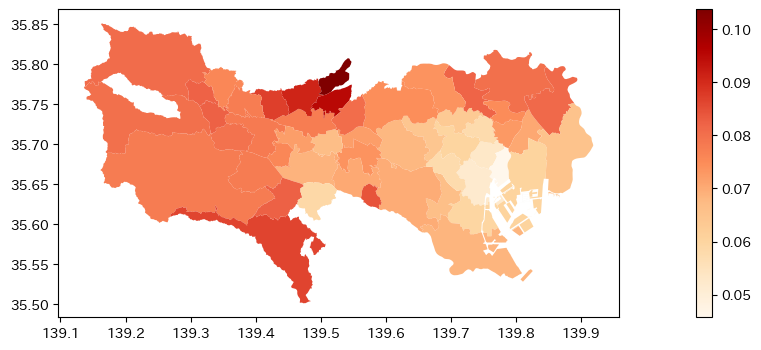

In [19]:
gdf_tokyo_population_clipped.plot(column='old', cmap='OrRd', legend=True, figsize=(20,4))
